<a href="https://colab.research.google.com/github/khandakerrahin/Public-AI-Challenge-Progetto-Caproni/blob/rahin/Saliency_Map_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary packages

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def input_img(path):
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [224,224])
    return image

def normalize_image(img):
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm

def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap="ocean")
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = "ocean")
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap = "ocean" )
    plt.axis("off")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


102967424/102967424 [==============================] - 2s 0us/step


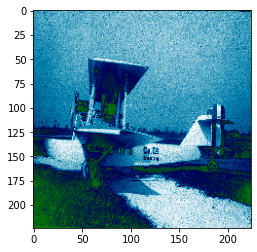

In [4]:
test_model = tf.keras.applications.resnet50.ResNet50()
#test_model.summary()

img_path = "/content/drive/MyDrive/Public AI Challenge: Progetto Caproni/11. Progetto Caproni/Fondo_fotografie_Caproni_1/Scatola 25 A/FC_25_01954.jpg"

input_img = input_img(img_path)
input_img = tf.keras.applications.densenet.preprocess_input(input_img)
plt.imshow(normalize_image(input_img[0]), cmap = "ocean")

In [5]:
result = test_model(input_img)
max_idx = tf.argmax(result,axis = 1)
tf.keras.applications.imagenet_utils.decode_predictions(result.numpy())

35363/35363 [==============================] - 0s 0us/step


[[('n04404412', 'television', 0.07591844),
  ('n01930112', 'nematode', 0.028305897),
  ('n02840245', 'binder', 0.015149871),
  ('n03467068', 'guillotine', 0.014932515),
  ('n03729826', 'matchstick', 0.013047236)]]

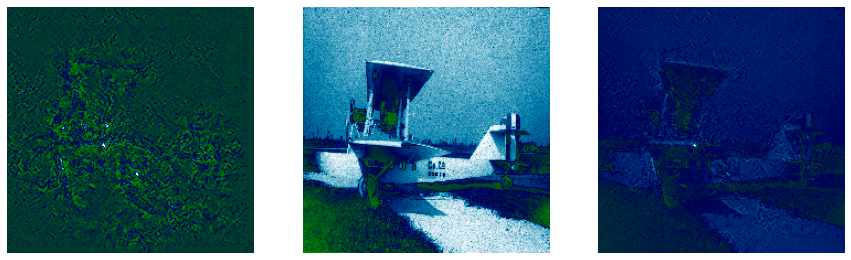

In [6]:
with tf.GradientTape() as tape:
    tape.watch(input_img)
    result = test_model(input_img)
    max_score = result[0,max_idx[0]]
grads = tape.gradient(max_score, input_img)


plot_maps(normalize_image(grads[0]), normalize_image(input_img[0]))